# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [1]:
pip install scikit-plot

In [2]:
pip install -U scikit-plot scipy

  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [3]:
pip install scipy==1.11.4

  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from joblib import parallel_backend

## Load Dataset

In [5]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [9]:
# Check Summary Statistics for the Dataset
summary_stats = df.describe()
summary_stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


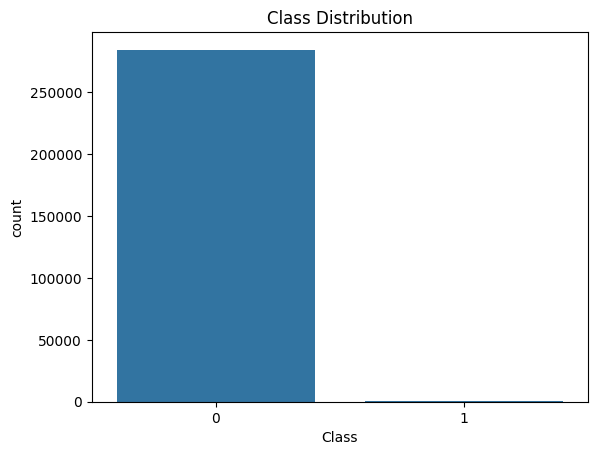

In [10]:
# ### 2.2 Class Distribution
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [11]:
# Display the class distribution in percentages
class_counts = df['Class'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{class_counts}")

Class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


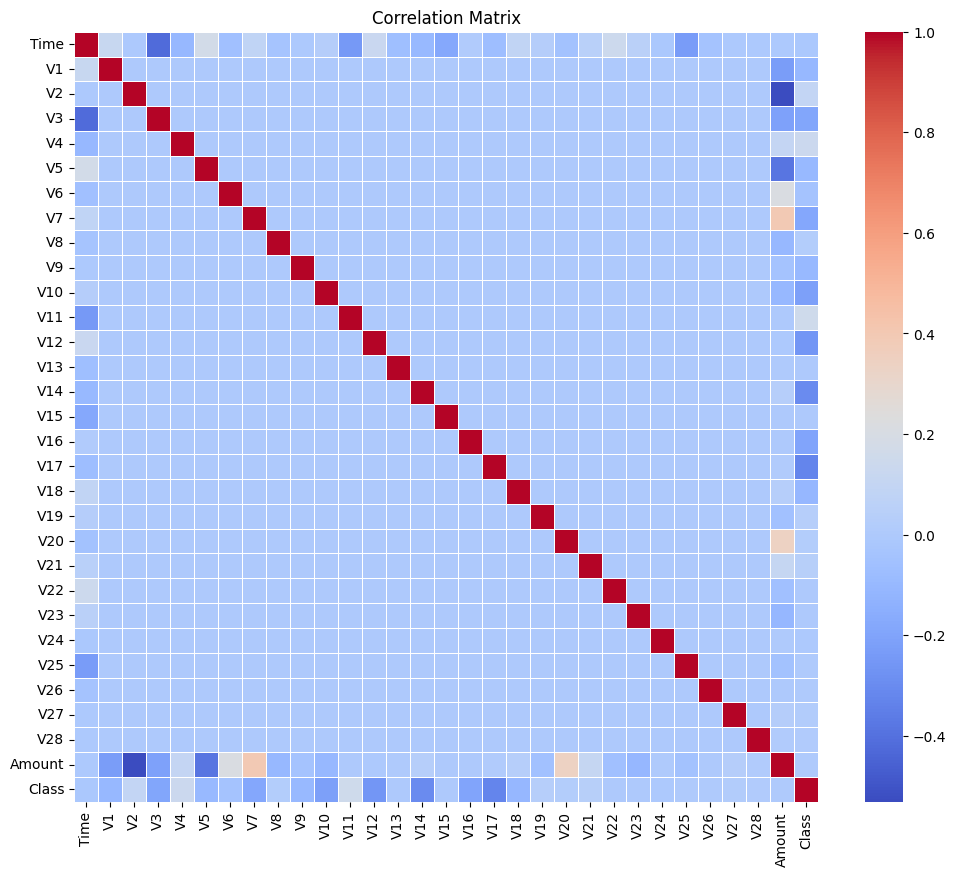

In [12]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
corr_matrix = df.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

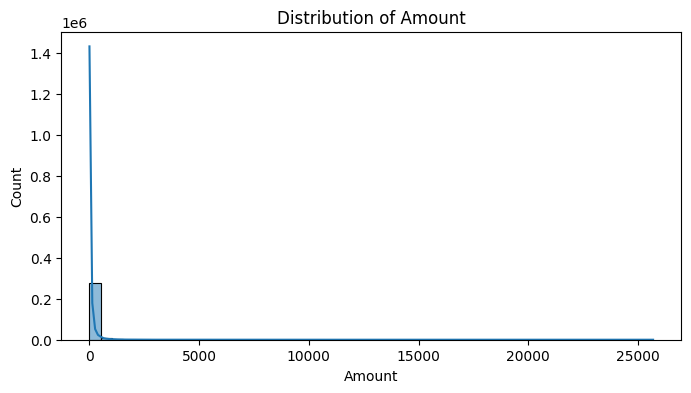

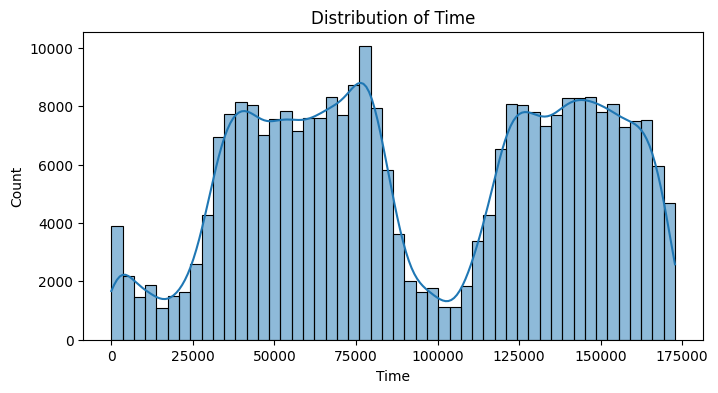

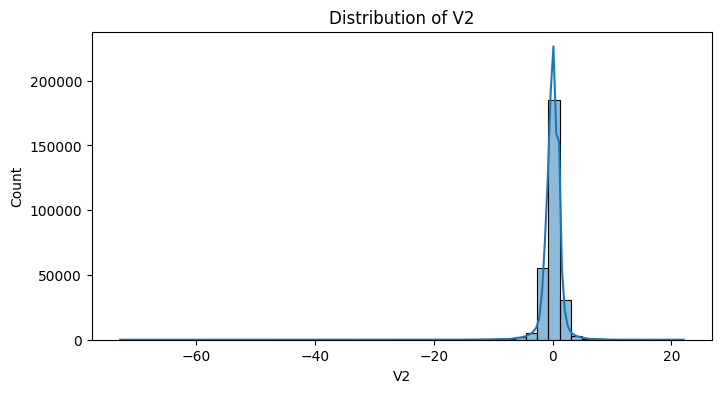

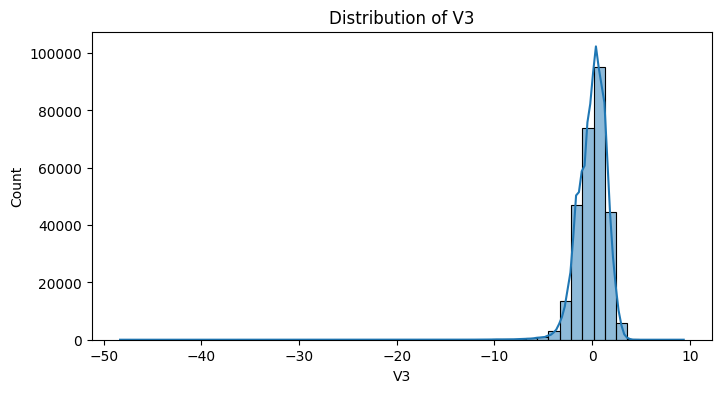

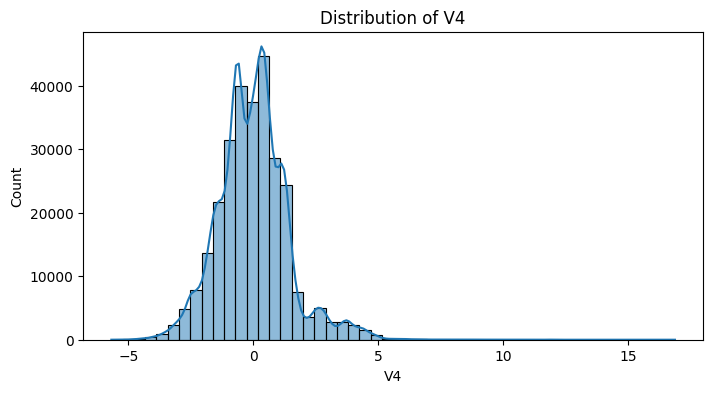

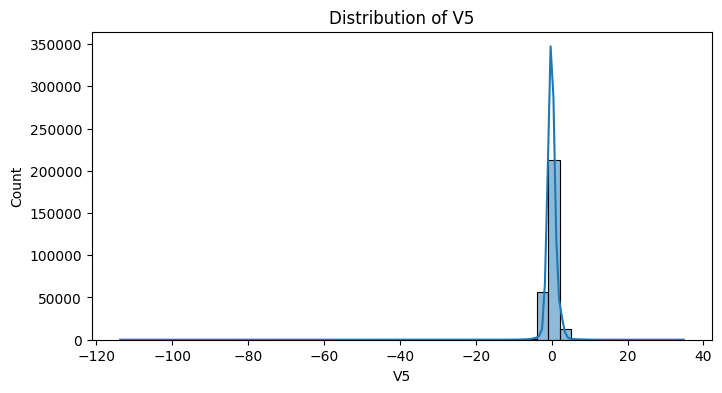

In [13]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
selected_features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']  # Select features to plot
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


#Add more creative analysis...


**Data Visualization (After Dimension Reduction)**

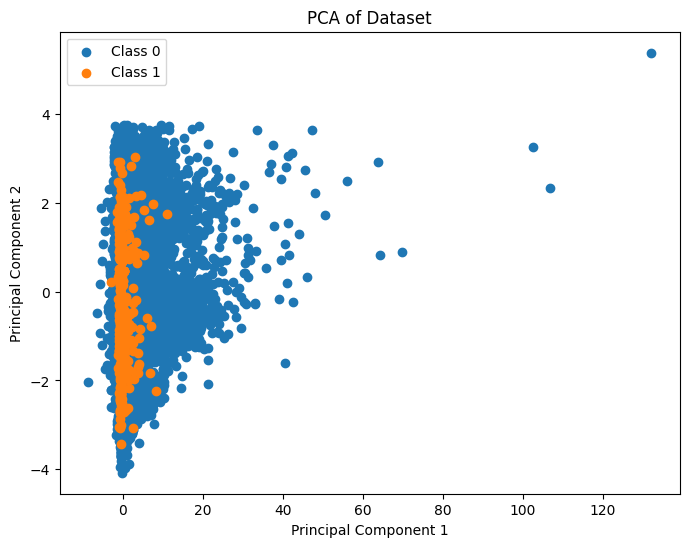

In [14]:
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y.values
# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['class'] == 0]['PC1'], pca_df[pca_df['class'] == 0]['PC2'], label='Class 0')
plt.scatter(pca_df[pca_df['class'] == 1]['PC1'], pca_df[pca_df['class'] == 1]['PC2'], label='Class 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.legend()
plt.show()


**Outlier Detection**

In [15]:
# Outlier detection

# Z-score calculation
from scipy.stats import zscore

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

z_scores = np.abs(zscore(X_scaled))
outliers = np.where(z_scores > 10)  # Threshold is X standard deviations

print(outliers[0].shape, outliers[1].shape)
print("Outliers detected using Z-score:", outliers)

(4530,) (4530,)
Outliers detected using Z-score: (array([   164,    164,   1158, ..., 284249, 284393, 284448]), array([20, 29, 10, ..., 29, 28, 28]))


**Insightful Plots**

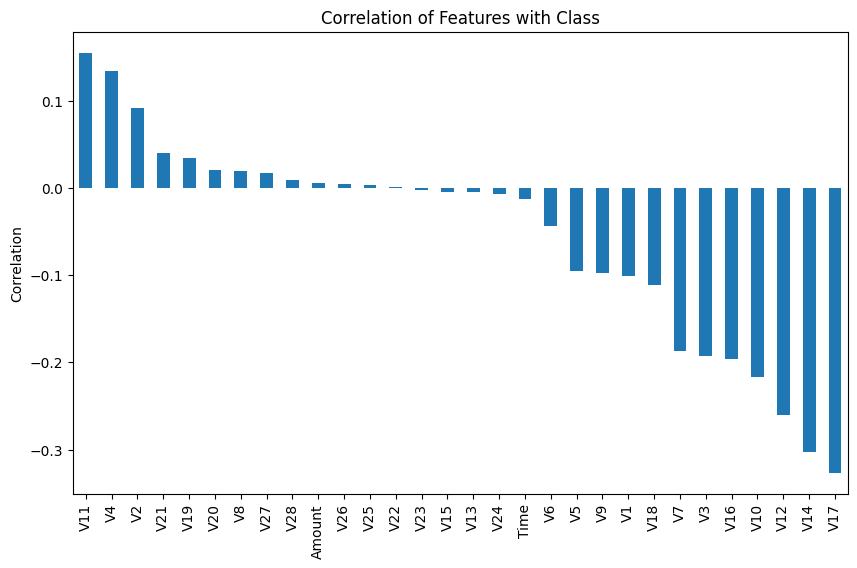

In [16]:
# Plot the correlation of features with the target variable
feature_target_corr = df.corr()['Class'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_target_corr.drop('Class').plot(kind='bar')
plt.title('Correlation of Features with Class')
plt.ylabel('Correlation')
plt.show()

**Additional Analysis Task: Clustering using KMeans**

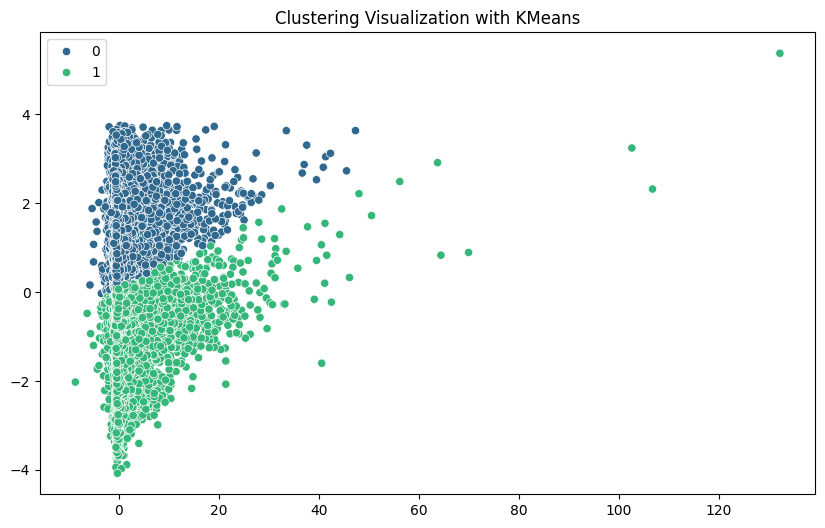

In [17]:
# Additional Analysis Task: Clustering using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principal_components)
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1], hue=labels, palette='viridis')
plt.title('Clustering Visualization with KMeans')
plt.show()

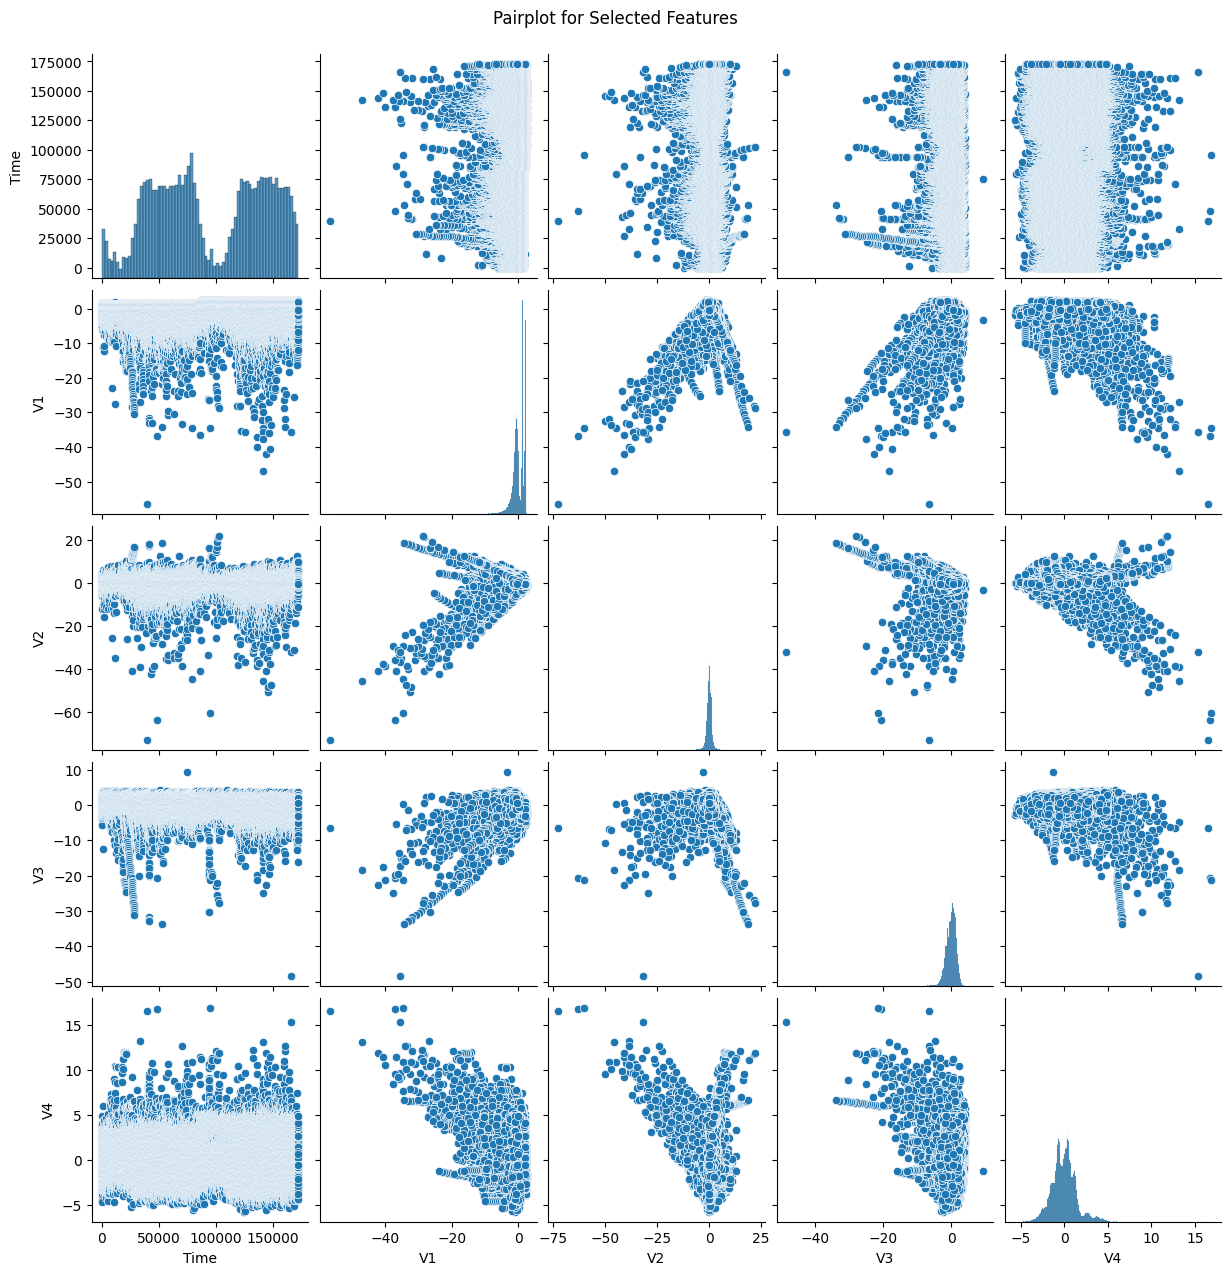

In [18]:
# Additional Insightful Plot: Pairplot for Selected Features
selected_features = ['Time', 'V1', 'V2', 'V3', 'V4']
sns.pairplot(df[selected_features],height=2.5)
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()

**Feature Engineering**

In [19]:
# Feature Engineering
# Add a new feature representing the total amount spent per transaction

new_df = df.copy()
new_df['TotalAmount'] = new_df['Amount'] * new_df['Time']

In [20]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,TotalAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.00
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.00
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,139.98


## Data Preprocessing

Some popular preprocessing techniques we can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [21]:
def standardize_features(X_train, X_test):
    # Standardize the features
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [22]:
def dataset_balancement(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    fraud_indices = np.where(y_train == 1)[0]
    not_fraud_indices = np.where(y_train == 0)[0]
    fraud_records =  len(fraud_indices)

    under_sample_indices = np.random.choice(not_fraud_indices, len(not_fraud_indices), False)
    upper_sample_indices = np.random.choice(fraud_indices, len(y_train), replace=True)

    y_train = y_train[np.concatenate([upper_sample_indices, under_sample_indices])]
    X_train = X_train[np.concatenate([upper_sample_indices, under_sample_indices])]
    print(X_train.shape, y_train.shape)
    return X_train, y_train

## Training

1. Train our model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation our best model using K-Fold Cross Validation
3. Crucial Step: Enhance our Model's Performance







# **Logistic Regression**

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

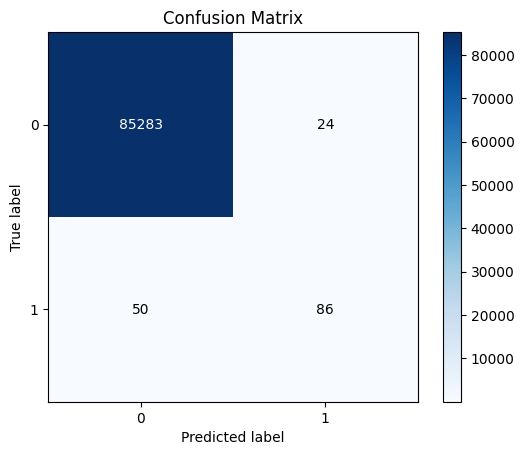

In [23]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg)

In [24]:
X_train_, y_train_ = dataset_balancement(X_train, y_train)
X_train_, X_test_ = standardize_features(X_train_, X_test)

(398372, 30) (398372,)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

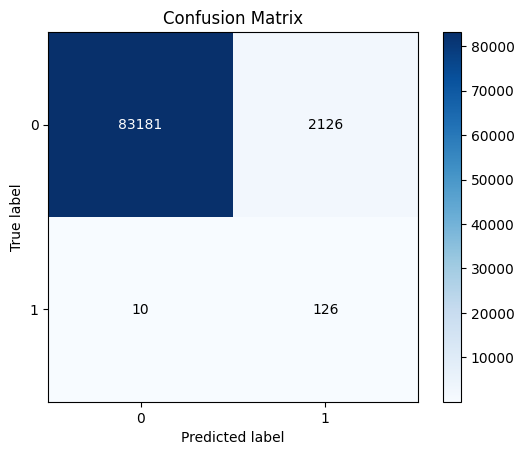

In [25]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_, y_train_)
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg)

# **SVM**

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

SVM Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

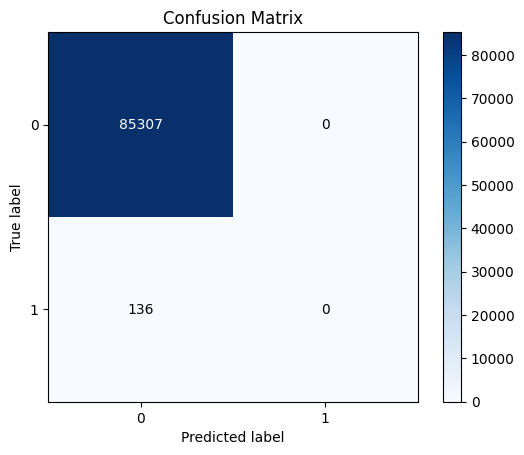

In [26]:
# Initialize and train the SVM model with a non-linear kernel
svm = SVC()
svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)

In [27]:
X_train_, X_test_ = standardize_features(X_train, X_test)
X_train_, y_train_ = dataset_balancement(X_train_, y_train)

(398372, 30) (398372,)


In [ ]:
# Initialize and train the SVM model with a non-linear kernel
svm = SVC()
svm.fit(X_train_, y_train_)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_)
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)